In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import os
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
'Colab Notebooks'		 GA_Image_Classification   Plants_dataset
 dataset_male_female		 GoldFish		   Smart_Fish_App
 fish_detection_classification	'My Drive'


In [19]:
%cd '/content/gdrive/MyDrive/dataset_male_female/Guppy'

/content/gdrive/MyDrive/dataset_male_female/Guppy


In [20]:
epochs = 50
lr = 1e-3
batch_size=128
data = []
labels = []

In [21]:
size=224

In [22]:
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   zoom_range=0.3,
                                   rotation_range=20,
                                   rescale=1/255)

In [23]:
test_gen = ImageDataGenerator(rescale=1/255)

In [24]:
target_size=(size,size)
target_size

(224, 224)

In [26]:
train_generator = train_datagen.flow_from_directory(directory='/content/gdrive/MyDrive/dataset_male_female/Guppy',
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    class_mode="binary")

Found 648 images belonging to 2 classes.


In [27]:
validation_generator = test_gen.flow_from_directory(directory='/content/gdrive/MyDrive/dataset_male_female/Guppy',
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    class_mode="binary")

Found 648 images belonging to 2 classes.


In [28]:
train_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [29]:
len(train_generator.classes)

648

In [30]:
train_generator.class_mode

'binary'

In [31]:
x,y = train_generator.next()

In [32]:
x

array([[[[0.427451  , 0.4039216 , 0.34901962],
         [0.427451  , 0.4039216 , 0.34901962],
         [0.427451  , 0.4039216 , 0.34901962],
         ...,
         [0.36862746, 0.34509805, 0.2901961 ],
         [0.3715952 , 0.3480658 , 0.29316384],
         [0.3749519 , 0.3514225 , 0.29652053]],

        [[0.427451  , 0.4039216 , 0.34901962],
         [0.427451  , 0.4039216 , 0.34901962],
         [0.427451  , 0.4039216 , 0.34901962],
         ...,
         [0.36862746, 0.34509805, 0.2901961 ],
         [0.3732685 , 0.3497391 , 0.29483712],
         [0.37411526, 0.35058585, 0.29568386]],

        [[0.427451  , 0.4039216 , 0.34901962],
         [0.427451  , 0.4039216 , 0.34901962],
         [0.427451  , 0.4039216 , 0.34901962],
         ...,
         [0.36862746, 0.34509805, 0.2901961 ],
         [0.3749418 , 0.3514124 , 0.29651043],
         [0.37327862, 0.3497492 , 0.29484725]],

        ...,

        [[0.4799469 , 0.46033904, 0.38582924],
         [0.48080343, 0.4611956 , 0.38668576]

In [33]:
x[0].shape

(224, 224, 3)

In [34]:
x[0]

array([[[0.427451  , 0.4039216 , 0.34901962],
        [0.427451  , 0.4039216 , 0.34901962],
        [0.427451  , 0.4039216 , 0.34901962],
        ...,
        [0.36862746, 0.34509805, 0.2901961 ],
        [0.3715952 , 0.3480658 , 0.29316384],
        [0.3749519 , 0.3514225 , 0.29652053]],

       [[0.427451  , 0.4039216 , 0.34901962],
        [0.427451  , 0.4039216 , 0.34901962],
        [0.427451  , 0.4039216 , 0.34901962],
        ...,
        [0.36862746, 0.34509805, 0.2901961 ],
        [0.3732685 , 0.3497391 , 0.29483712],
        [0.37411526, 0.35058585, 0.29568386]],

       [[0.427451  , 0.4039216 , 0.34901962],
        [0.427451  , 0.4039216 , 0.34901962],
        [0.427451  , 0.4039216 , 0.34901962],
        ...,
        [0.36862746, 0.34509805, 0.2901961 ],
        [0.3749418 , 0.3514124 , 0.29651043],
        [0.37327862, 0.3497492 , 0.29484725]],

       ...,

       [[0.4799469 , 0.46033904, 0.38582924],
        [0.48080343, 0.4611956 , 0.38668576],
        [0.48165995, 0

In [35]:
model = Sequential()
model.add(InceptionV3(include_top=False, pooling='avg', weights='imagenet'))
model.add(Flatten())

model.add(BatchNormalization())
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

model.layers[0].trainable=False

87924736/87910968 [==============================] - 1s 0us/step


In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 batch_normalization_94 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 batch_normalization_95 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 1024)              2

In [37]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
train_generator.filenames

['Guppy Male/1 (1).jpg',
 'Guppy Male/1 (10).JPG',
 'Guppy Male/1 (100).jpg',
 'Guppy Male/1 (109).jpg',
 'Guppy Male/1 (11).JPG',
 'Guppy Male/1 (12).JPG',
 'Guppy Male/1 (13).JPG',
 'Guppy Male/1 (15).JPG',
 'Guppy Male/1 (160).jpg',
 'Guppy Male/1 (161).jpg',
 'Guppy Male/1 (161)11.jpg',
 'Guppy Male/1 (161)21.jpg',
 'Guppy Male/1 (164).jpg',
 'Guppy Male/1 (167).jpg',
 'Guppy Male/1 (17).JPG',
 'Guppy Male/1 (170).jpg',
 'Guppy Male/1 (18).JPG',
 'Guppy Male/1 (180).jpg',
 'Guppy Male/1 (181).jpg',
 'Guppy Male/1 (181)4.jpg',
 'Guppy Male/1 (185).jpg',
 'Guppy Male/1 (187).jpg',
 'Guppy Male/1 (19).JPG',
 'Guppy Male/1 (192).jpg',
 'Guppy Male/1 (1922).jpg',
 'Guppy Male/1 (1923).jpg',
 'Guppy Male/1 (193).jpg',
 'Guppy Male/1 (195).jpg',
 'Guppy Male/1 (196).jpg',
 'Guppy Male/1 (2).jpg',
 'Guppy Male/1 (200).jpg',
 'Guppy Male/1 (21).JPG',
 'Guppy Male/1 (210).jpg',
 'Guppy Male/1 (213).jpg',
 'Guppy Male/1 (214).jpg',
 'Guppy Male/1 (218).jpg',
 'Guppy Male/1 (219).jpg',
 'Guppy

In [39]:
len(train_generator.filenames), batch_size , len((train_generator.filenames))//batch_size

(648, 128, 5)

In [40]:
model.fit(train_generator, steps_per_epoch=len((train_generator.filenames))//batch_size,epochs=2,validation_data=validation_generator,validation_steps=len(validation_generator.filenames)//batch_size)

Epoch 1/2
5/5 [==============================] - 87s 12s/step - loss: 1.2039 - accuracy: 0.6942 - val_loss: 3.4550 - val_accuracy: 0.3359
Epoch 2/2
5/5 [==============================] - 17s 4s/step - loss: 0.8470 - accuracy: 0.7462 - val_loss: 0.8255 - val_accuracy: 0.6734


In [41]:
model.save('Guppy_Gender.h5')

In [44]:
img_path = '/content/gdrive/MyDrive/dataset_male_female/Guppy/Guppy Male/1515151.jpg'

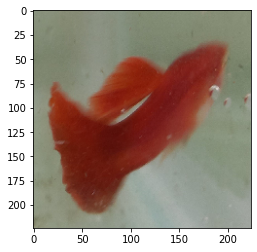

In [45]:
img = load_img(img_path,target_size=(size,size,3))
plt.imshow(img)

In [46]:
img = img_to_array(img)

In [47]:
img = img/255.0

In [48]:
img = img.reshape(1,size,size,3)

In [49]:
img.shape

(1, 224, 224, 3)

In [50]:
model.predict(img)

array([[0.7702475]], dtype=float32)

In [51]:
from keras.models import load_model
models = load_model('Guppy_Gender.h5')
def get_classes(data):
  prob = models.predict(data)[0][0]
  if prob<=0.5:
    return 'Guppy Male', (1 - prob)*100
  else:
    return 'Guppy Female', prob*100

In [52]:
get_classes(img)

('Guppy Female', 77.02475190162659)

In [53]:
def get_prediction(img_path):
  img = load_img(img_path, target_size=(size, size, 3))
  plt.imshow(img)
  img = img_to_array(img)
  img = img/255.0
  img = img.reshape(1, size, size, 3)
  pred, prob = get_classes(img)
  return pred, prob

('Guppy Female', 99.88495111465454)

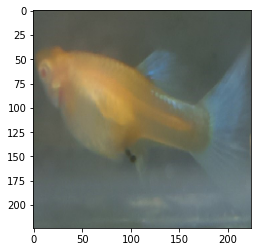

In [54]:
get_prediction('/content/gdrive/MyDrive/dataset_male_female/Guppy/Guppy_Female/1 (51).jpg')